In [2]:
import networkx as nx

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,8)

In [5]:
all_enron_graph = nx.Graph()

In [6]:
with open('/Users/maxperozek/CP341/Day14/enron-all.csv') as f:
    line = f.readline()
    while line:
        u,v = line.strip().split(',')
        all_enron_graph.add_edge(u,v)
        line = f.readline()

In [7]:
conn = list(nx.connected_components(all_enron_graph)) # get the conneted components from the enron graph

In [8]:
[len(item) for item in conn]

[2, 1071, 2, 4, 2, 3, 4, 2, 2, 6, 2, 2]

In [10]:
# get the largest connected component from the enron graph
# we will use this as our graph for social network analysis
sub_enron_graph = nx.subgraph(all_enron_graph,conn[1])

In [11]:
len(sub_enron_graph.nodes()),len(sub_enron_graph.edges())

(1071, 1698)

In [13]:
pos = nx.spring_layout(sub_enron_graph)

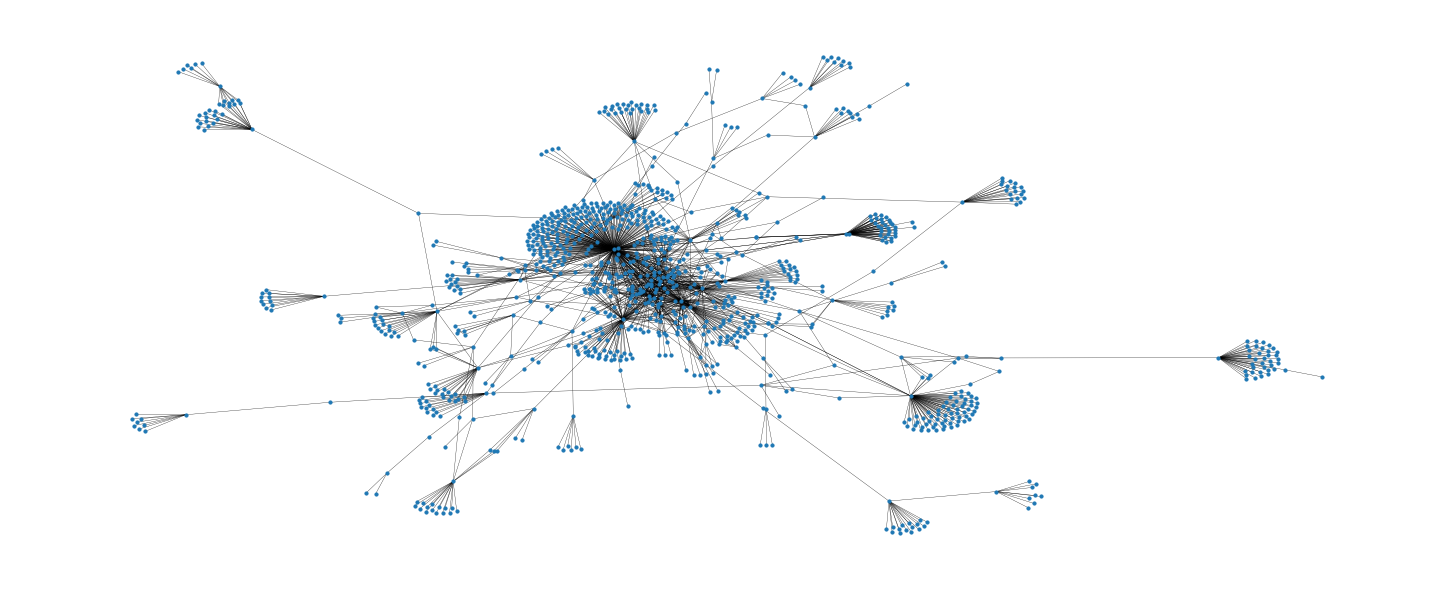

In [19]:
# Use a spring layout to visualize the social network in a semi intelligible way
nx.draw(sub_enron_graph, pos=pos, node_size=10.0, width=.3)

In [22]:
degs = [item[1] for item in list(sub_enron_graph.degree())]

In [23]:
unique = set(degs)

In [24]:
deg_data = []

In [25]:
# build a histogram for node degree

for deg in unique:
    deg_data.append((deg, degs.count(deg)))

In [26]:
deg_data = np.array(deg_data)

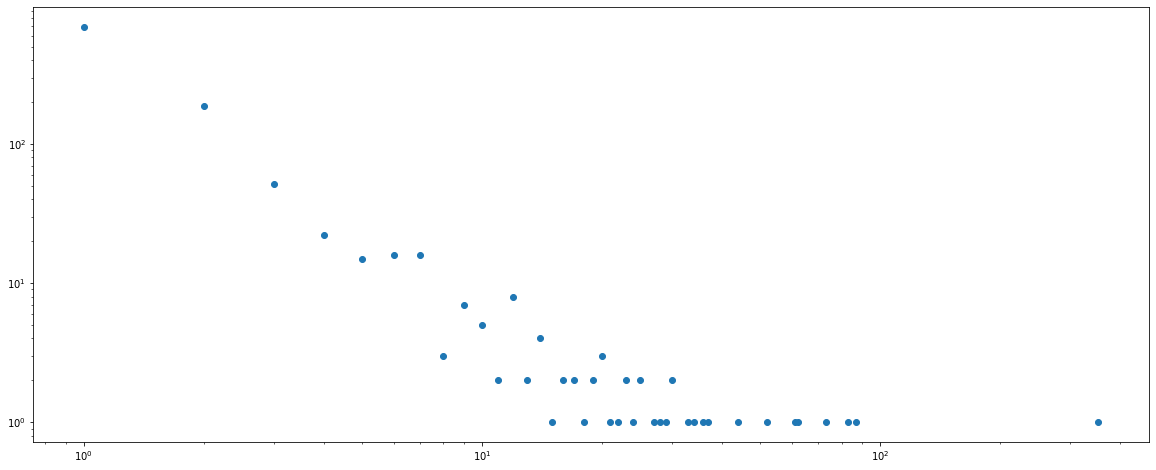

In [56]:
plt.scatter(
    deg_data[:,0],
    deg_data[:,1]
)
plt.xscale('log')
plt.yscale('log')

Above plot shows the number of nodes for each degreee. We see that this social network exhibits the scale free property.

Find the central users under some measure of centrality. Look up these people by name. Does it make sense that they would be central to the org?

In [27]:
# compute the different centrality measures that we have looked at in class

In [28]:
degree_color = nx.degree_centrality(sub_enron_graph)

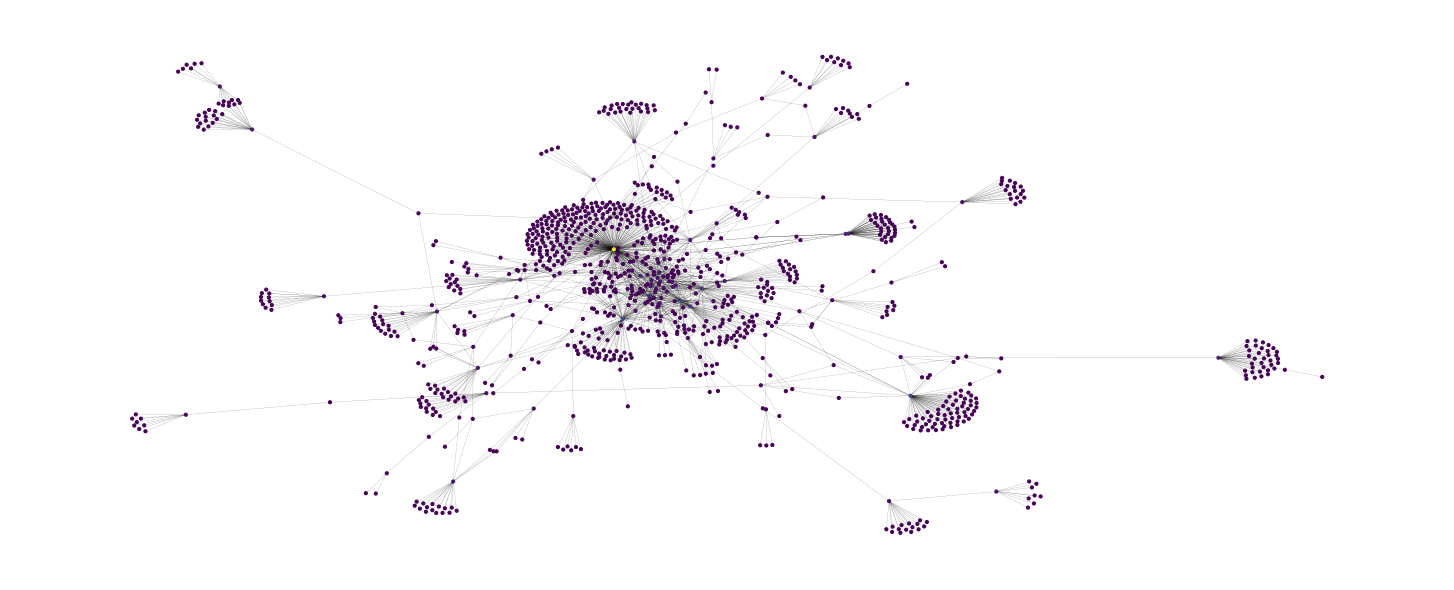

In [29]:
nx.draw(
    sub_enron_graph, 
    pos=pos,
    node_size=10.0,
    node_color=[degree_color[v] for v in list(sub_enron_graph.nodes)],
    width=0.1
)

In [30]:
betwixt_color = nx.betweenness_centrality(sub_enron_graph)

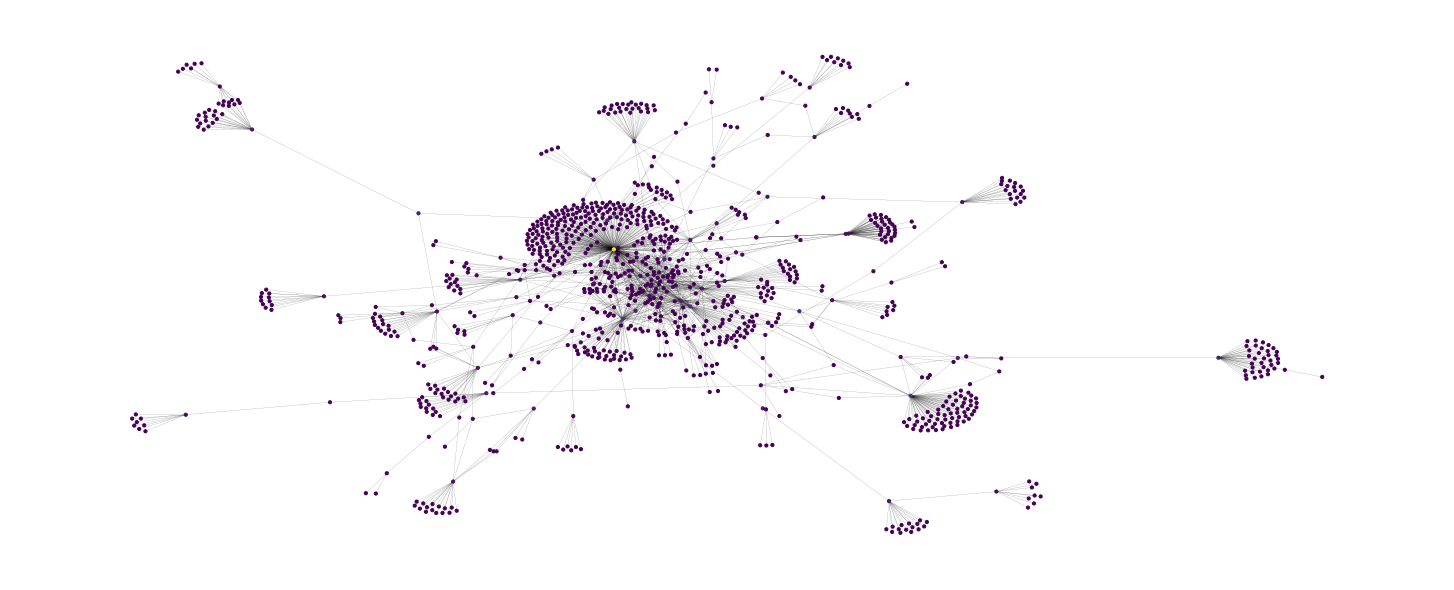

In [31]:
nx.draw(
    sub_enron_graph, 
    pos=pos,
    node_size=10.0,
    node_color=[betwixt_color[v] for v in list(sub_enron_graph.nodes)],
    width=0.1
)

In [32]:
eig_color = nx.eigenvector_centrality(sub_enron_graph)

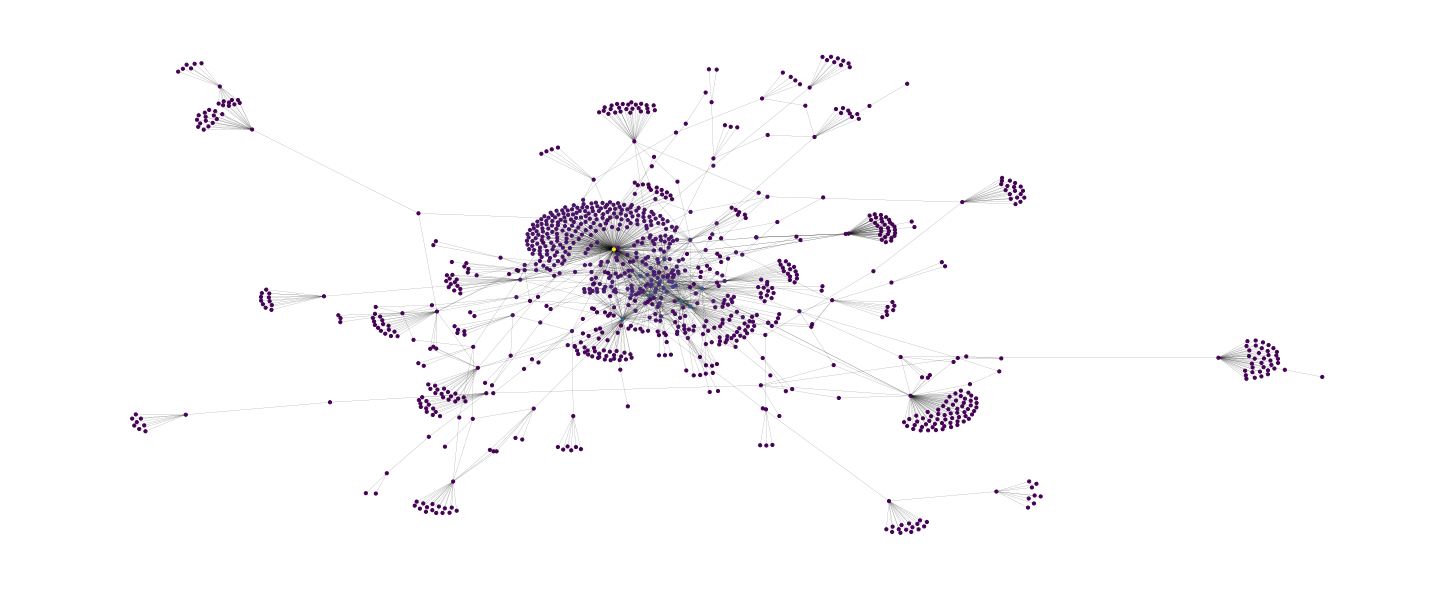

In [33]:
nx.draw(
    sub_enron_graph, 
    pos=pos,
    node_size=10.0,
    node_color=[eig_color[v] for v in list(sub_enron_graph.nodes)],
    width=0.1
)

In [34]:
close_color = nx.closeness_centrality(sub_enron_graph)

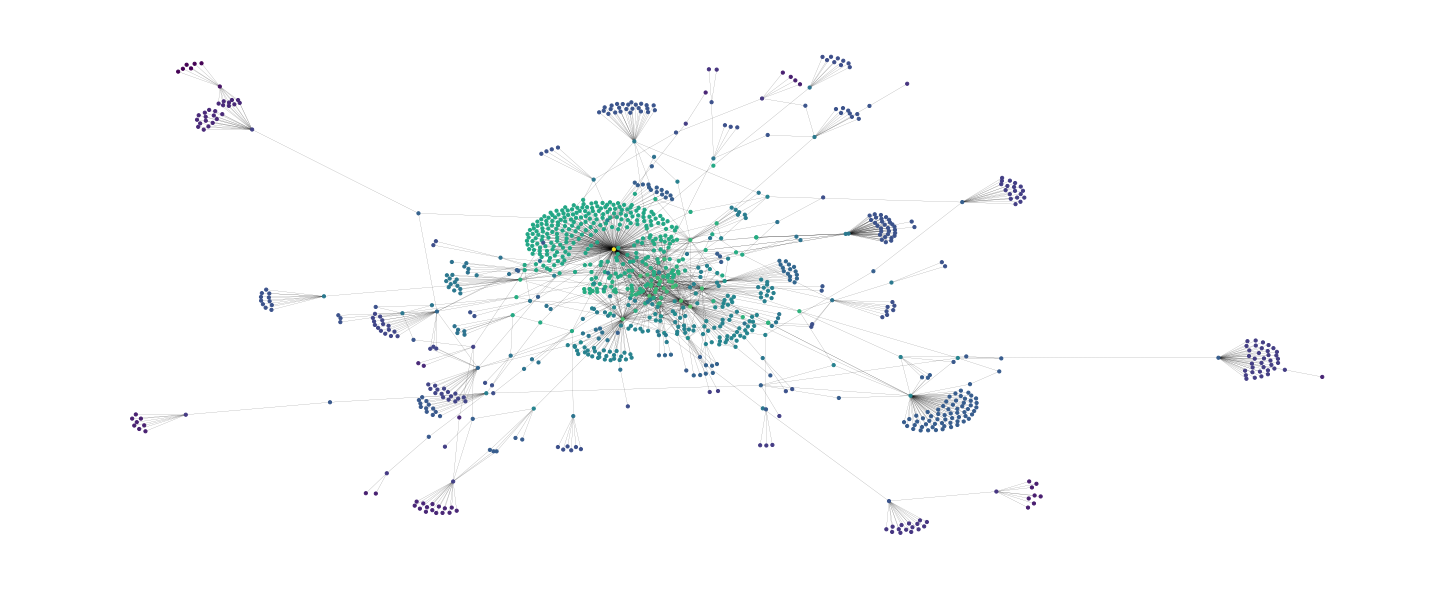

In [35]:
nx.draw(
    sub_enron_graph, 
    pos=pos,
    node_size=10.0,
    node_color=[close_color[v] for v in list(sub_enron_graph.nodes)],
    width=0.1
)

In [36]:
top_degree = sorted([(v, degree_color[v]) for v in list(sub_enron_graph.nodes)], key=lambda x: x[1], reverse=True)[:5]
top_betwixt = sorted([(v, betwixt_color[v]) for v in list(sub_enron_graph.nodes)], key=lambda x: x[1], reverse=True)[:5]
top_eig = sorted([(v, eig_color[v]) for v in list(sub_enron_graph.nodes)], key=lambda x: x[1], reverse=True)[:5]
top_close = sorted([(v, close_color[v]) for v in list(sub_enron_graph.nodes)], key=lambda x: x[1], reverse=True)[:5]

In [37]:
top_degree

[('steven.kean', 0.3299065420560748),
 ('alan.comnes', 0.08130841121495327),
 ('john.shelk', 0.07757009345794393),
 ('j.kaminski', 0.06822429906542056),
 ('mary.hain', 0.05794392523364486)]

Steven Kean: Enron's senior vice president of government affairs

Alan Comnes: Director Government and Regulatory Affairs

John Shelk: Enron's D.C. lobbyist

Vincent Kaminski: Managing Director for Research

Mary Hain: Lawyer based in Enron’s West Coast trading hub

In [38]:
top_betwixt

[('steven.kean', 0.7458384251951611),
 ('john.shelk', 0.12053840458087837),
 ('j.kaminski', 0.12037187451267967),
 ('jeff.dasovich', 0.1152015380971218),
 ('douglass@arterhadden.com', 0.0911511602860237)]

In [39]:
top_eig

[('steven.kean', 0.568557951837616),
 ('alan.comnes', 0.20570421963542548),
 ('susan.mara', 0.17687748935295677),
 ('john.shelk', 0.17655478982285766),
 ('jeff.dasovich', 0.16025632364457282)]

In [40]:
top_close

[('steven.kean', 0.42076287848997246),
 ('jeff.dasovich', 0.3388220392653578),
 ('alan.comnes', 0.3344795248515161),
 ('susan.mara', 0.3324013668841255),
 ('john.shelk', 0.3311668214175178)]

Stephen Kean tops all of the lists with some overlap in the rest of the top 5